# Linear Algebra with Python: Next Steps

In [1]:
import numpy as np

## Linear Algebra & NumPy Recap

Linear algebra is the branch of mathematics dealing with linear equations and their representations in vector spaces and through matrices. Much of machine learning is built on top of linear algebra making it an important skill for data scientists to know.

We'll focus on some of the most useful tools in linear algebra for machine learning, and how to implement them with NumPy, but we'll first start out some review of the basics!

First, some helpful notation:
 - By $A_{m \times n}$ we denote a matrix $A$ with m rows and n columns.
 - By $\vec{x}$ in $\mathbb{R}^n$, we denote a vector with n entries. By convention, an n-dimensional vector is often thought of as a matrix with n rows and 1 column, known as a column vector:
 
 $$\vec{x} = \begin{pmatrix}x_1\\ x_2\\ ... \\ x_n\end{pmatrix}$$


<h4>Vectors and Matrices</h4>

Recall a vector, $\vec{x}$ in $\mathbb{R}^n$. In practice vectors usually have two main interpretations
    
      1. A list of n numbers or a collection
      2. Location and direction in n-dimensional space.
    
For example, the vector $\vec{x} = \begin{pmatrix}1\\1\end{pmatrix}$ could represent two items in a list, or could be represented by the position and direction shown by the red arrow in the graph below.
    
![vector (1,1)](../images/vec1.png) 


We will mostly focus on the numerical interpretation of vectors, but it is often intereasting and helpful to think about their geometric interpretations. In particular, we will focus on some of the interpretations of linear algebra that are directly related to machine learning.

Recall a matrix, $A$ with m rows and n columns. Similarly to vectors, matrices have a few main interpretations:

    1. A collection of many vectors (i.e. a list of lists)
    2. A system of equations
    3. A linear transformation

<h4>Machine Learning Recap</h4>

Recall the ideas behind supervised[1] machine learning: you have inputs $x_1, x_2, ..., x_n$ with labels $y_1, y_2, ..., y_n$, then you are trying to find patterns in the data to predict the labels for new inputs. A very convenient way to represent this as a system of linear equations where you have a matrix $X_{nxd}$ of all your x values:

$$ \mathbf{X} = \begin{pmatrix}x_{0,0} & x_{0,1} & ... & x_{0,d}\\x_{1,0} & x_{1,1} & ... & x_{1,d}\\  &  & ... & \\x_{n,0} & x_{n,1} & ... & x_{n,d}\end{pmatrix} $$

And an n-dimensional vector $\vec{y} \in \mathbb{R}^n$:

$$\vec{y} = \begin{pmatrix}y_1\\ y_2\\ ... \\ y_n\end{pmatrix}$$

Then we want to find a $d \times 1$ vector $\beta$ that <i>best</i> represents the relationship between x and y:

$$ \vec{\beta} = \begin{pmatrix}\beta_0\\ \beta_1\\ ... \\ \beta_d\end{pmatrix} $$

This ends up giving us the system of equations $\mathbf{X}\vec{\beta} = \vec{y}$:

$$\begin{pmatrix}x_{0,0} & x_{0,1} & ... & x_{0,d}\\x_{1,0} & x_{1,1} & ... & x_{1,d}\\  &  & ... & \\x_{n,0} & x_{n,1} & ... & x_{n,d}\end{pmatrix} \begin{pmatrix}\beta_0\\ \beta_1\\ ... \\ \beta_d\end{pmatrix} =\begin{pmatrix}y_1\\ y_2\\ ... \\ y_n\end{pmatrix}$$

In order to understand and work with this system of equations, we will review matrix multiplication, dot products, and how to use numpy to find them!


$$$$


[1] If you are new to machine learning, supervised learning is used when you have enough labeled data for an outcome you are trying to predict. The goal is to generate a function (multiplication with $\hat{\beta}$) that takes input data ($X$) to predict it's output ($\vec{y}$). There are two main types of supervised machine learning, classification and regression. In classification, your labels are from a discrete set of outputs (ex. {Yes, No}, {1,2,3}, etc.). In Regression, your labels are from a continous set (ex. $\mathbb{R}$, [0,1], etc.)

<h4>Matrix multiplication</h4>

When dealing with systems of equations, or wanting to find Matrix multiplication between two matrices X and Y, expressed in NumPy as $X@Y$ or <i>np.matmul(X,Y)</i> works as follows:

$$\begin{pmatrix}a_{0,0} & ... & a_{0,n}\\  &  ... & \\a_{m,0} & ... & a_{m,n}\end{pmatrix} \begin{pmatrix}b_{0,0} &  ... & b_{0,p}\\  &  ... & \\b_{n,0} & ... & b_{n,p}\end{pmatrix} = \begin{pmatrix}a_{0,0} * b_{0,0} + ... + a_{0,n} * b_{n,0} & ... & a_{0,0} * b_{0,p} + ... + a_{0,n} * b_{n,p}\\ & ... & \\a_{m,0} * b_{0,0} + ... + a_{m,n} * b_{n,0} & ... & a_{m,0} * b_{0,p} + ... + a_{m,n} * b_{n,p}\end{pmatrix}$$

Recall that the dimensions must line up - ${M}_{n \times m}, {N}_{m \times p} \rightarrow MN_{n \times p}$
Which means that matrix multiplication is not commutative, for example: 

$$\mathbf{M} = \begin{pmatrix}2 & 4 & 6\\3 & 5 & 7\end{pmatrix}\qquad
\mathbf{N} = \begin{pmatrix}1 & 2 & 3\\ 4 & 5 & 6\\7 & 8 & 9\end{pmatrix}$$
$\mathbf{MN}$ is defined, but $\mathbf{NM}$ is not.

Furthermore, if we take a look back at the system of equations defined by $\mathbf{X}\vec{\beta} = \vec{y}$, we can see that $\mathbf{X}$ is a $n \times d$-dimensional vector, and $\beta$ is a $d \times 1$-dimensional vector. Therefore, matrix multiplication is defined, and should output a $1 \times n$-dimensional vector, which lines up with $\vec{y}$'s dimensionality!

<h4>Dot Products</h4>

Dot products are a special case of matrix multiplication. The dot product between two vectors of the same size, $\vec{x} \cdot \vec{y}$, is found by the taking the sum of multiplying corresponding entries. i.e. for $\vec{x} = \begin{pmatrix}x_1 & x_2 & \cdots & x_n\end{pmatrix}$ and $ \vec{y} = \begin{pmatrix}y_1 & y_2 & \cdots & y_n\end{pmatrix}$

$$\vec{x} \cdot \vec{y} = x_1y_1 + x_2y_2 + \cdots + x_ny_n$$

<b><u>Exercise<u></b> Implement functions to find the dot product between two vectors first using python code, then using NumPy. (Note: NumPy has a 'dot' function you can use!)

In [3]:
def dot_product_python(A, B):
    # Write implentation using python here
    pass

In [4]:
def dot_product_numpy(A, B):
    # Write implementation using NumPy here
    pass

Now, use your functions to find the dot product between the following vectors:

$$A_1=\begin{pmatrix}2\\4\\1\\7\\4\end{pmatrix} \qquad B_1=\begin{pmatrix}1\\9\\0\\0\\1\end{pmatrix}$$

$$A_2=[1]^{1000000} \qquad B_2=[2]^{1000000}$$

In [5]:
%%time

A1 = [2,4,1,7,4]
B1 = [1,9,0,0,1]

A2 = [1] * 1000000
B2 = [2] * 1000000

dot_product_python(A2, B2)

CPU times: user 6.4 ms, sys: 3.82 ms, total: 10.2 ms
Wall time: 11.3 ms


In [6]:
%%time

A = np.array([2,4,1,7,4])
B = np.array([1,9,0,0,1])

A2 = np.ones(1000000)
B2 = np.ones(1000000) * 2

dot_product_numpy(A2, B2)

CPU times: user 7.49 ms, sys: 4.22 ms, total: 11.7 ms
Wall time: 19.7 ms


Notice how much more efficient numpy arrays and operations are in higher dimensions, <i>and</i> how much easier it is to find a dot product. What else does NumPy make easier? Lots!!

<b><u>Exercise</u></b> Using NumPy do the following:

    1. Find MN
    2. show that NM is not defined


In [6]:
M = np.array([[2,4,6],[3,5,7]])
N = np.array([[1,2,3],[4,5,6],[7,8,9]])

# find MN

# show what happens when you try to multiply NM

## Special Types of Matrices

<b><u>Square Matrix</u></b>: Square matrices have the same number of rows and columns. Examples of square matrices are:

$$\begin{pmatrix}1 & 0\\-1 & 0\end{pmatrix} \qquad \begin{pmatrix}1 & 2 & 3\\4 & 5 & 6\\7 & 8 & 9\end{pmatrix} \qquad \begin{pmatrix}1 & 0 & 0 & 0\\1 & 1 & 0 & 0\\1 & 1 & 1 & 0\\1 & 1 & 1 & 1\end{pmatrix}$$

<b><u>Identity Matrix</u></b>: Identity matrices are square matrices with ones along the diagonal, and zeros everywhere else. The $n \times n$ identity matrix is the <i>multiplicative identity</i> for $n \times n$ matrices. Essentially, it does the same thing that the number 1 does with scalar multiplication in $\mathbb{R}$. Essentially, for $A_{nxn}$ we have that  $AI = IA = A$. For example:

$$\begin{pmatrix}1 & 2 & 3\\4 & 5 & 6\\7 & 8 & 9\end{pmatrix} \begin{pmatrix}1 & 0 & 0\\ 0 & 1 & 0\\0 & 0 & 1\end{pmatrix} = \begin{pmatrix}1 & 2 & 3\\4 & 5 & 6\\7 & 8 & 9\end{pmatrix}$$

Furthermore, $I_{nxn}$ is the multiplicative inverse of any matrix for which matrix multiplication is defined. If we have $B_{dxn}$, then $BI=B$, and if we have $C_{nxd}$, then $IC = C.$ 

<b><u>Inverse Matrix</u></b>: Another important application of the identity matrix comes up when we define inverse matrices. The inverse of a matrix is defined as $A^{-1}$ such that $AA^{-1} = A^{-1}A = I$. Note that not all matrices have inverses. Non-square matrices, for example, do not have inverses by definition. However, for some square matrices $A$, it may still be the case that $A^{-1}$ may not exist. The quick way to check for invertibility is to find the determinant [1] of a matrix. For $n \times n$ matrix $A$, if $det(A) = 0$, then the matrix is not invertible. Otherwise $A$ is invertible. We can use NumPy to help us figure this out, and to find the inverse of a matrix! 

[1] The determinant of a matrix is a scalar found from the entries of a matrix that characterizes some properties of the matrix.

<b>Exercise:</b> Find the determinant of the matrices A, B, C and D defined below. If the determinant $\neq 0$, find it's inverse. Then verify that the product of a matrix and it's inverse is the identity. With NumPy, you can use np.eye(n) to produce $I_{n \times n}$. (NumPy has a great library for linear algebra which you can use here, and which we will be using throughout the course: https://numpy.org/doc/stable/reference/routines.linalg.html).

In [13]:
# Find determinant of all matrices below. If possible, then find it's inverse.

A = np.array([[1,2,3],[0,1,4],[5,6,0]])

B = np.array([[1,2,3],[4,5,6],[7,8,9]])

C = np.array([[6,-1,-1],[-1,6,-1],[-1,-1,1]])

D = np.array([[-2,4],[1,-3]])

<b><u>Diagonal Matrix</u></b> Diagonal matrices are square matrices which have entries along the diagonal and zeros everywhere else. Diagonal matrices are nice to work with because:

1. Their eigenvalues and eigenvectors are known (will cover this in later section)
2. Raising diagonal matrices to a power is equivalent to raising each of it's diagonal entries to that power. Instead of multiplying out a matrix p times, you can just computer scalars to a power instead:

$$\begin{pmatrix}\ x_1 & 0 & 0\\0 & x_2 & 0\\0 & 0 & x_3\end{pmatrix} \times \begin{pmatrix}\ x_1 & 0 & 0\\0 & x_2 & 0\\0 & 0 & x_3\end{pmatrix} \times ... \times \begin{pmatrix}\ x_1 & 0 & 0\\0 & x_2 & 0\\0 & 0 & x_3\end{pmatrix} = \begin{pmatrix}\ (x_1)^p & 0 & 0\\0 & (x_2)^p & 0\\0 & 0 & (x_3)^p\end{pmatrix}$$

<b><u>Exercise</u></b>: Computationally, find the results of taking the matrices below to the expressed powers:

$$ \begin{pmatrix}1 & 0 & 0\\0 & 2 & 0\\0 & 0 & 3\end{pmatrix}^{ 3} \qquad \begin{pmatrix}-1 & 0 & 0\\0 & 2 & 0\\0 & 0 & 1\end{pmatrix}^{5}$$

## Inner Products and Norms

Inner product is another term for dot product, and in this section we will further explore the importance of finding the inner product between vectors and normalizing vectors. Consider the supervised machine learning scenario presented earlier, where you have n entries of d-dimensional feature vectors represented as $X$, n labels for those feature vectors, $\vec{y},$ and the *best* $\vec{\beta}$ that represents the relationship between $X$ and $\vec{y}$. This is a very general model, and there are many different algorithms that fall under the umbrella of 'supervised machine learning.' But they all beg the question of what does *best* mean in this context. In general, *best* means the value for $\beta$ which minimizes the error when predicting $\vec{y}$. The way we typically find this prediction error is by finding the norm of $(X\vec{\beta} - \vec{y})$.

The <b><u>norm</u></b> of a vector informally represents the 'length' of a vector. For example, the $\ell_2$-norm (a.k.a the Euclidean norm) is the square root of the dot product of a vector with itself, represented as $\|\vec{x}\|$:

$$\|\vec{x}\| = \sqrt{x_0^2 + x_1^2 + \cdots + x_n^2}$$

Similarly, there are other types of norms, $\ell_1$-norm (finds returns the sum of the absolute value of each entry), and the $\ell_{\infty}$-norm (returns the maximum of the absolute value of each entry of a vector).

<b><u>Exercise</u></b> find the $\ell_1$-norm, $\ell_2$-norm and $\ell_{\infty}$-norm of the following vectors:

$$\vec{a} = \begin{pmatrix}\ 4\\-2\\-7\\3\end{pmatrix} \qquad \vec{b} = \begin{pmatrix}\ 1\\1\\1\\1\\1\end{pmatrix} \qquad \vec{c} = \begin{pmatrix}\ 100\\10\\0\\-10\\-100\end{pmatrix}$$

In [28]:
from numpy.linalg import norm

a = np.array([4,-2,7,3])
b = np.array([1,1,1,1,1])
c = np.array([100,10,0,-10,-100])

# Using numpy or computations, find l_1, l_2, l_inf norms of a and b

# For a:
print(f"l2 norm: {norm(a)}")
print(f"l1 norm: {norm(a, 1)}")
print(f"l_inf norm: {norm(a, np.inf)}")

# For b:
print(norm(b))

# For c:
print(norm(c))
print(norm(c, 1))
print(norm(c, np.inf))

l2 norm: 8.831760866327848
l1 norm: 16.0
l_inf norm: 7.0
2.23606797749979
142.12670403551894
220.0
100.0


<b><u>Orthogonal Vectors</u></b>: Orthogonal means perpindicular, so if two vectors are orthogonal then they are perpindicular to one another. Computationally, two vectors are orthogonal if $\vec{x} \cdot \vec{y} = 0$. For example, the two red vectors below are orthogonal.

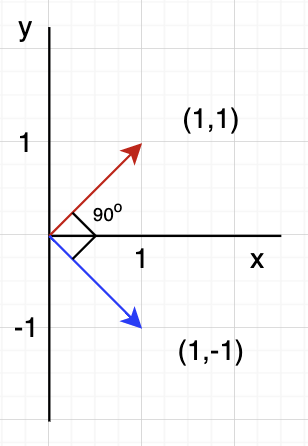

<b><u>Exercise</u></b>: Determine which of the following pairs of vectors are orthogonal.
    
$$\vec{a}=\begin{pmatrix}1\\0\\0\end{pmatrix},\vec{b}=\begin{pmatrix}0\\1\\0\end{pmatrix}$$

$$\vec{c}=\begin{pmatrix}1\\1\\1\end{pmatrix},\vec{d}=\begin{pmatrix}5\\2\\0\end{pmatrix}$$

$$\vec{e}=\begin{pmatrix}1\\-1\\0\end{pmatrix},\vec{f}=\begin{pmatrix}-1\\1\\0\end{pmatrix}$$

In [29]:
a = np.array([1,0,0])
b = np.array([0,1,0])
c = np.array([1,1,1])
d = np.array([5,2,0])
e = np.array([1,-1,0])
f = np.array([-1,1,0])

print(np.dot(a,b))
print(np.dot(c,d))
print(np.dot(e,f))

# determine which pairs of vectors out of (a,b), (c,d), and (e,f) are orthogonal

0
7
-2


## Eigenvalues and Eigenvectors

<b><u>Matrix Decomposition</u></b>: Matrix decompositions are used to reduce a matrices to their constituent parts, which is helpful for simplifying complex operations!

<b><u>Principle Component Analysis</u></b> In machine learning when trying to train a model from a given dataset, you'll often find yourself having really high-dimensional data (i.e., a really large value of d). This is often hard to deal with, and if you can break it into a smaller set of "summary indices", then it is easier to analyze and visualize your data. One way to deal with this is by using <b>Principal Component Analysis</b> (PCA), where you calculate a projection of the original data into the same number of or fewer dimensions. In order to do PCA, you need to understand eigenvalues and eigenvectors.

<b><u>Eigenvalues and Eigenvectors</u></b> Eigen in German means characteristic, so *eigenvector* means characteristic vector. In order to get a better understanding of what this means, it's useful to return back to our geometric interpretation of linear algebra. Just as we could think of vectors as location and direction, we can think of matrices as linear transformations, where matrix-vector multiplication transforrms a vector. With this idea in mind, we can define $\lambda$ as the <b>eigenvalue</b> for a matrix $A$ for corresponding non-zero <b>eigenvector</b> $\vec{x}$ such that $A\vec{x} = \lambda\vec{x}$. Intuitively, this definition means that multiplying $A$ by the vector $\vec{x}$ results in a new vector that points in the same direction as $\vec{x}$, but scaled by a factor $\lambda$. You can only find eigenvalues and eigenvectors for square matrices, and there can only be (at most) as many eigenvectors as the dimension of the matrix. 

For example, if you consider the example below, the matrix $A$ transforms vector $\vec{v}$ by extending it by a value of two without changing it's direction. Therefore, 2 is the **eigenvalue** for matrix $A$ for corresponding **eigenvector** $\vec{v}$.

$$A = \begin{pmatrix}2 & 0\\0 & 2\end{pmatrix} \qquad \vec{v} = \begin{pmatrix}1\\1\end{pmatrix}$$

![eig1](../images/eig1.png)

There is a general method you can use to find the eigenvectors and eigenvalues of a matrix, 

<b><u>Exercise</u></b> Using NumPy, find the eigenvalues of the following matrices:

$$J = \begin{pmatrix}\ 2 & 2 & 2\\2 & 2 & 2\\2 & 2 & 2\end{pmatrix} \qquad K = \begin{pmatrix}\ 1 & 2 & 3\\0 & 4 & 5\\0 & 0 & 6\end{pmatrix} \qquad L = \begin{pmatrix}\ 0 & 0 & 1\\0 & 2 & 0\\3 & 0 & 0\end{pmatrix}$$

In [30]:
from numpy.linalg import eig

J = np.array([[2,2,2],[2,2,2],[2,2,2]])
K = np.array([[1,2,3],[0,4,5],[0,0,6]])
L = np.array([[0,0,1],[0,2,0],[3,0,0]])

# Using NumPy, find the eigenvalues and their corresponding eigenvectors for each of the matrices above.
values, vectors = eig(J)
print(f"values: {values}")
print(f"vectors: {vectors}")


values: [-4.4408921e-16  6.0000000e+00  0.0000000e+00]
vectors: [[-0.81649658  0.57735027  0.        ]
 [ 0.40824829  0.57735027 -0.70710678]
 [ 0.40824829  0.57735027  0.70710678]]


## Singular Value Decomposition

Another popular form of matrix decomposition that is used to help with dimensionality reduction and compression is **Singular Value Decomposition** (SVD). 

Since we can only decompose square matrices into eigenvalues and eigenvectors, we turn to SVD to decompose non-square $m \times n$-dimensional matrices. In very simplified terms, SVD is just decomposing vectors onto orthogonal (perpindicular) axes. There's a lot of interesting geometry behind SVD which we will not get into today, but the general idea is that we typically think of 2-dimensional vectors in terms of the x- and y-axes, but we can really think of vectors in terms of different bases. The x- and y-axes are represented by the unit vectors: (1,0) and (0,1), and we typically represent vectors in $\mathbb{R}^2$ as (*how much you move in the direction of (1,0), how much you move in the direction of (0,1)*, a.k.a, (*how much you move right, how much you move left*). 

![svd1](../images/svd1.png)

For example, in the graph above: we see that we move to the right 1 unit, and to the left 1 unit. 

But, the same vector represented as (1,1) in $\mathbb{R}^2$ can be represented as something else when we change what these **basis vectors** are. If instead we use the matrix below as our basis, then (1,1) would be represented as (0,1), since you move 1 $\times$ (1,1) and 0 $\times$(1,-1). 

$$\begin{pmatrix}1 & -1\\1 & 1\end{pmatrix}$$

![svd2](../images/svd2.png)

In order to express multiple vectors making up a matrix in another way, we can extend this concept multiple times, and what we get is essentially taking a matrix $A_{m \times n}$ and factoring it into $A = U \Sigma V^{*}$, where $U_{m \times m}$, $V_{n \times n}$, and $\Sigma_{m \times n}$ is a diagonal matrix. Learning what these other matrices mean is beyond the scope of this class, but there are definitely some great resources if you'd like to learn more! For now, we can use NumPy to help us decompose non-diagonal matrices. 

<b><u>Exercise</u></b> Using SVD in NumPy, decompose the following matrix:

$$J = \begin{pmatrix}\ 1 & 2\\0 & 1\\2 & -1\end{pmatrix}$$

In [31]:
from numpy.linalg import svd
J = np.array([[1,2],[0,1],[2,-1]])

U, sigma_diagonals, V = svd(J, full_matrices=False)
sigma = np.diag(sigma_diagonals)
print(U)
print(sigma)
print(V)

# use NumPy to decompose this matrix

[[-0.81649658 -0.4472136 ]
 [-0.40824829  0.        ]
 [ 0.40824829 -0.89442719]]
[[2.44948974 0.        ]
 [0.         2.23606798]]
[[-0. -1.]
 [-1. -0.]]
